# ROC and PR curve on Test Sets
This notebook reproduces figure 2 of our paper. It computes ROC and PR curves for human and _Salmonella_.

It requires numpy, pandas, matplotlib, scikit-learn and matplotlib_venn libraries for python.

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
plt.rc('font', family='Times New Roman')
import seaborn
from matplotlib_venn import venn2, venn2_circles
%matplotlib inline

/home/sasse/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [45]:
# PARAMETERS
taxon = 9606

## 1. Load Test Set Predictions for all tools

### 1.1 Load performance of TriPepSVM

In [47]:
# TriPepSVM
res_pos = pd.read_csv('../data/test/TriPepSVM/RBP_{}.TriPepSVM.pred.txt'.format(taxon),
                      sep='\t', header=None,
                      names=['Uniprot_ID', 'Score', 'Class'])
res_pos['Label'] = 1
res_neg = pd.read_csv('../data/test/TriPepSVM/NRBP_{}.TriPepSVM.pred.txt'.format(taxon),
                      sep='\t', header=None,
                      names=['Uniprot_ID', 'Score', 'Class'])
res_neg['Label'] = -1
test_res = pd.concat((res_pos, res_neg))
print ("Loaded predictions for {} RBPs and {} NRBPs".format(res_pos.shape[0], res_neg.shape[0]))

Loaded predictions for 181 RBPs and 1204 NRBPs


### 1.2 Load performance of RBPPred

In [48]:
# RBPPred
rbppred_pos = pd.read_csv('../data/test/RBPPred/RBP_{}.RBPPred.pred.temp'.format(taxon), sep='\t')
rbppred_pos['Label'] = 1
rbppred_neg = pd.read_csv('../data/test/RBPPred/NRBP_{}.RBPPred.pred.temp'.format(taxon), sep='\t')
rbppred_neg['Label'] = -1
rbppred_test_all = pd.concat((rbppred_pos, rbppred_neg))
print ("Loaded predictions for {} RBPs and {} NRBPs".format(rbppred_pos.shape[0], rbppred_neg.shape[0]))#

Loaded predictions for 181 RBPs and 1204 NRBPs


### 1.3 Load performance of RNApred

In [49]:
# RNApred
rnapred_pos = pd.read_csv('../data/test/RNAPred/RBP_{}.RNAPred.pred.txt'.format(taxon), sep='\t',
                          header=0, names=['Name', 'Score', 'Class'])
rnapred_pos['Label'] = 1
rnapred_neg = pd.read_csv('../data/test/RNAPred/NRBP_{}.RNAPred.pred.txt'.format(taxon), sep='\t',
                          header=0, names=['Name', 'Score', 'Class'])
rnapred_neg['Label'] = -1
rnapred_test_all = pd.concat((rnapred_pos, rnapred_neg))
print ("Loaded predictions for {} RBPs and {} NRBPs".format(rnapred_pos.shape[0], rnapred_neg.shape[0]))

Loaded predictions for 178 RBPs and 1203 NRBPs


### 1.4 Load performance of SPOT-seq-RNA

In [50]:
# SPOT-seq-RNA
spot_pos = pd.read_csv('../data/test/SpotSeqRna/RBP_{}.SpotSeqRna.pred.txt'.format(taxon), sep='\t\t',
                       header=None, names=['Name', 'Class'])
spot_pos['Score'] = spot_pos.Class == 'RNA-binding protein'
spot_pos['Label'] = 1
spot_neg = pd.read_csv('../data/test/SpotSeqRna/NRBP_{}.SpotSeqRna.pred.txt'.format(taxon), sep='\t\t',
                       header=None, names=['Name', 'Class'])
spot_neg['Score'] = spot_neg.Class == 'RNA-binding protein'
spot_neg['Label'] = 0
spot_test_all = pd.concat((spot_pos, spot_neg))
print ("Loaded predictions for {} RBPs and {} NRBPs".format(spot_pos.shape[0], spot_neg.shape[0]))

Loaded predictions for 181 RBPs and 1204 NRBPs


/pkg/python-3.6.0-0/lib/python3.6/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()
/pkg/python-3.6.0-0/lib/python3.6/site-packages/ipykernel/__main__.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


## 2. Compute ROC Curve for all Tools

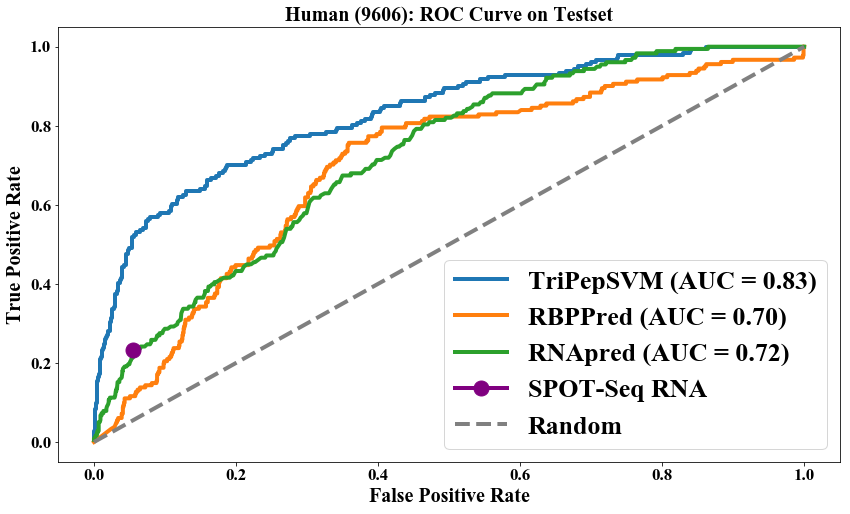

In [51]:
linewidth = 4
labelfontsize = 20
ticksize = 17

# TriPepSVM
fpr, tpr, thresholds = roc_curve(y_score=test_res.Score, y_true=test_res.Label)
roc_auc = roc_auc_score(y_score=test_res.Score, y_true=test_res.Label)

# RBPPred
rbppred_fpr, rbppred_tpr, t_rbppr = roc_curve(y_score=rbppred_test_all.Score, y_true=rbppred_test_all.Label)
rbppred_roc_auc = roc_auc_score(y_score=rbppred_test_all.Score, y_true=rbppred_test_all.Label)

# RNAPred
rnapred_fpr, rnapred_tpr, t_rnapr = roc_curve(y_score=rnapred_test_all.Score, y_true=rnapred_test_all.Label)
rnapred_roc_auc = roc_auc_score(y_score=rnapred_test_all.Score, y_true=rnapred_test_all.Label)

# SPOT-seq
spot_fpr, spot_tpr, t_spot = roc_curve(y_score=spot_test_all.Score, y_true=spot_test_all.Label)
spot_roc_auc = roc_auc_score(y_score=spot_test_all.Score, y_true=spot_test_all.Label)

fig = plt.figure(figsize=(14, 8))
plt.plot(fpr, tpr, lw=linewidth, label='TriPepSVM (AUC = {0:.2f})'.format(roc_auc))
plt.plot(rbppred_fpr, rbppred_tpr, lw=linewidth, label='RBPPred (AUC = {0:.2f})'.format(rbppred_roc_auc))
plt.plot(rnapred_fpr, rnapred_tpr, lw=linewidth, label='RNApred (AUC = {0:.2f})'.format(rnapred_roc_auc))
plt.plot(spot_fpr[-2], spot_tpr[-2], markersize=15, marker='o', lw=linewidth, label='SPOT-Seq RNA', color='purple') # second last point is the only non-inferred one
plt.plot([0, 1], [0, 1], color='gray', lw=linewidth, linestyle='--', label='Random')

plt.xlabel('False Positive Rate', fontsize=labelfontsize)
plt.ylabel('True Positive Rate', fontsize=labelfontsize)
plt.tick_params(axis='both', labelsize=ticksize)
#plt.title('Performance: ROC Curve ({})'.format(taxon), fontsize=labelfontsize)
species_name = 'Human'
if taxon == 561:
    species_name = 'E.Coli'
elif taxon == 590:
    species_name = 'Salmonella'
plt.title('{} ({}): ROC Curve on Testset'.format(species_name, taxon),
          fontsize=labelfontsize)
plt.legend(loc='lower right', prop={'size': 26})
fig.savefig('roc_curve_testset_{}.pdf'.format(taxon))

## 3. Compute PR Curve for all Tools

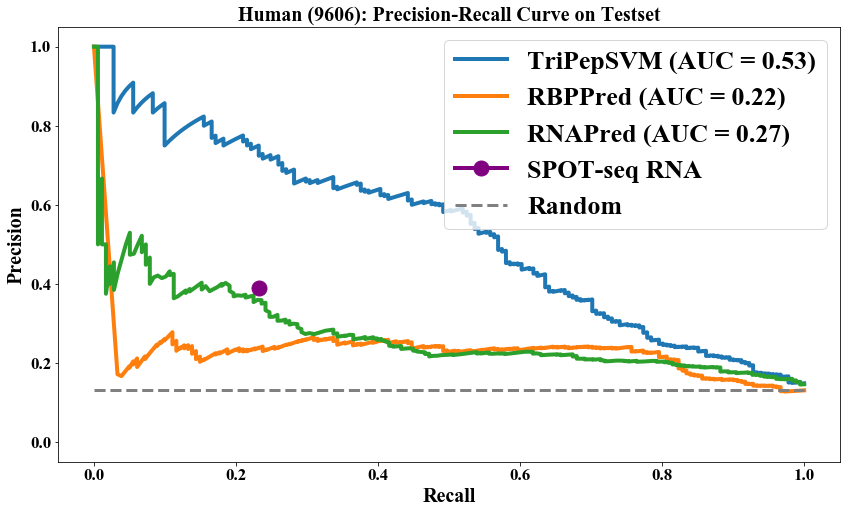

In [53]:
linewidth = 4
labelfontsize = 20
ticksize = 17

# OligoPepSVM
pr, rec, thresholds = precision_recall_curve(probas_pred=test_res.Score, y_true=test_res.Label)
pr_auc = average_precision_score(y_score=test_res.Score, y_true=test_res.Label)
zero_idx_oli = (np.abs(thresholds)).argmin() # our initial cutoff is 0

# RBPPred
rbppred_pr, rbppred_rec, t_pr_rbppr = precision_recall_curve(probas_pred=rbppred_test_all.Score, y_true=rbppred_test_all.Label)
rbppred_pr_auc = average_precision_score(y_score=rbppred_test_all.Score, y_true=rbppred_test_all.Label)
zero_idx_rbp = (np.abs(t_pr_rbppr - 0.5)).argmin() # probabilities and cutoff is 0.5

# RNApred
rnapred_pr, rnapred_rec, t_pr_rnapr = precision_recall_curve(probas_pred=rnapred_test_all.Score, y_true=rnapred_test_all.Label)
rnapred_pr_auc = average_precision_score(y_score=rnapred_test_all.Score, y_true=rnapred_test_all.Label)
zero_idx_rna = (np.abs(t_pr_rnapr + 0.2)).argmin() # cutoff is -0.2

# SPOT-seq RNA
spot_pr, spot_rec, t_pr_spot = precision_recall_curve(probas_pred=spot_test_all.Score, y_true=spot_test_all.Label)
spot_pr_auc = average_precision_score(y_score=spot_test_all.Score, y_true=spot_test_all.Label)

fig = plt.figure(figsize=(14, 8))
plt.plot(rec, pr, lw=linewidth, label='TriPepSVM (AUC = {0:.2f})'.format(pr_auc))
plt.plot(rbppred_rec, rbppred_pr, lw=linewidth, label='RBPPred (AUC = {0:.2f})'.format(rbppred_pr_auc))#, color='darkgreen')
plt.plot(rnapred_rec, rnapred_pr, lw=linewidth, label='RNAPred (AUC = {0:.2f})'.format(rnapred_pr_auc))#, color='darkred')
plt.plot(spot_rec[1], spot_pr[1], markersize=15, lw=linewidth, marker='o', label='SPOT-seq RNA', color='purple')
random_y = test_res[test_res.Label == 1].shape[0] / test_res.shape[0]
plt.plot([0, 1], [random_y, random_y], color='gray', lw=3, linestyle='--', label='Random')

# plot points for cutoff zero
#plt.plot(rec[zero_idx_oli], pr[zero_idx_oli], marker='v', markersize=15, color='darkblue', lw=linewidth)
#plt.plot(rbppred_rec[zero_idx_rbp], rbppred_pr[zero_idx_rbp], marker='v', markersize=15, color='darkgreen', lw=linewidth)
#plt.plot(rnapred_rec[zero_idx_rna], rnapred_pr[zero_idx_rna], marker='v', markersize=15, color='darkred', lw=linewidth)

plt.xlabel('Recall', fontsize=20)
plt.ylabel('Precision', fontsize=20)
plt.tick_params(axis='both', labelsize=ticksize)
plt.title('{} ({}): Precision-Recall Curve on Testset'.format(species_name, taxon),
          fontsize=labelfontsize)
plt.legend(loc='upper right', prop={'size': 26})
plt.ylim([-0.05, 1.05])
fig.savefig('pr_curve_testset_{}.pdf'.format(taxon))

## 4. Compute Optimal Cutoffs
We can derive the best thresholds for classification using the point on the PR curve that has minimal distance to the optimal PR curve (the point in the upper right corner).

We find the optimal threshold by:
\begin{equation}
\hat{T}_c = arg\min_{t} \bigg( \sqrt{(1 - rec_c(t))^2 + (1 - pr_c(t))^2} \bigg)
\end{equation}
where $\hat{T}_c$ is the optimal cutoff.

In [54]:
distances = np.sqrt(np.sum((np.array([1, 1]) - np.array([rec, pr]).T)**2, axis=1))
idx = np.argmin(distances)
best_threshold = thresholds[idx]
print ("OligoPepSVM: Optimal classification threshold: {}".format(best_threshold))

OligoPepSVM: Optimal classification threshold: 0.686317067850579


In [55]:
distances = np.sqrt(np.sum((np.array([1, 1]) - np.array([rbppred_rec, rbppred_pr]).T)**2, axis=1))
idx = np.argmin(distances)
best_t_rbppred_pr = t_pr_rbppr[idx]
print ("RBPPred: Optimal classification threshold: {}".format(best_t_rbppred_pr))

RBPPred: Optimal classification threshold: 0.812041


In [56]:
distances = np.sqrt(np.sum((np.array([1, 1]) - np.array([rnapred_rec, rnapred_pr]).T)**2, axis=1))
idx = np.argmin(distances)
best_t_rnapred_pr = t_pr_rnapr[idx]
print ("RNAPred: Optimal classification threshold: {}".format(best_t_rnapred_pr))

RNAPred: Optimal classification threshold: -0.24
